In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyreadstat
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [2]:
# calling volumes
subcortical_vol_file_path = r"Z:\Active-Diagnose_CTE\Fargol_Analysis\Neuropsychiatric_from_Volumes\aseg_20231117.csv"
subcortical_vol = pd.read_csv(subcortical_vol_file_path)
subcortical_vol = pd.DataFrame(subcortical_vol)

# Left Hemisphere
lh_aparc_area_file_path = r"Z:\Active-Diagnose_CTE\Fargol_Analysis\Neuropsychiatric_from_Volumes\lh_aparc_area_20231117.csv"
lh_aparc_area = pd.read_csv(lh_aparc_area_file_path)
lh_aparc_area = pd.DataFrame(lh_aparc_area)

lh_aparc_meancurv_file_path = r"Z:\Active-Diagnose_CTE\Fargol_Analysis\Neuropsychiatric_from_Volumes\lh_aparc_meancurv_20231117.csv"
lh_aparc_meancurv = pd.read_csv(lh_aparc_meancurv_file_path)
lh_aparc_meancurv = pd.DataFrame(lh_aparc_meancurv)

lh_aparc_thickness_file_path = r"Z:\Active-Diagnose_CTE\Fargol_Analysis\Neuropsychiatric_from_Volumes\lh_aparc_thickness_20231117.csv"
lh_aparc_thickness = pd.read_csv(lh_aparc_thickness_file_path)
lh_aparc_thickness = pd.DataFrame(lh_aparc_thickness)

lh_aparc_volume_file_path = r"Z:\Active-Diagnose_CTE\Fargol_Analysis\Neuropsychiatric_from_Volumes\lh_aparc_volume_20231117.csv"
lh_aparc_volume = pd.read_csv(lh_aparc_volume_file_path)
lh_aparc_volume = pd.DataFrame(lh_aparc_volume)


# Right Hemisphere
rh_aparc_area_file_path = r"Z:\Active-Diagnose_CTE\Fargol_Analysis\Neuropsychiatric_from_Volumes\rh_aparc_area_20231117.csv"
rh_aparc_area = pd.read_csv(rh_aparc_area_file_path)
rh_aparc_area = pd.DataFrame(rh_aparc_area)

rh_aparc_meancurv_file_path = r"Z:\Active-Diagnose_CTE\Fargol_Analysis\Neuropsychiatric_from_Volumes\rh_aparc_meancurv_20231117.csv"
rh_aparc_meancurv = pd.read_csv(rh_aparc_meancurv_file_path)
rh_aparc_meancurv = pd.DataFrame(rh_aparc_meancurv)

rh_aparc_thickness_file_path = r"Z:\Active-Diagnose_CTE\Fargol_Analysis\Neuropsychiatric_from_Volumes\rh_aparc_thickness_20231117.csv"
rh_aparc_thickness = pd.read_csv(rh_aparc_thickness_file_path)
rh_aparc_thickness = pd.DataFrame(rh_aparc_thickness)

rh_aparc_volume_file_path = r"Z:\Active-Diagnose_CTE\Fargol_Analysis\Neuropsychiatric_from_Volumes\rh_aparc_volume_20231117.csv"
rh_aparc_volume = pd.read_csv(rh_aparc_volume_file_path)
rh_aparc_volume = pd.DataFrame(rh_aparc_volume)



In [3]:
import os
main_path = r'Z:\Active-Diagnose_CTE\Fargol_Analysis\Neuropsychiatric_from_Volumes'
folder_name = 'volumetrics_to_neuropsych'  
save_path = os.path.join(main_path, folder_name)
os.makedirs(save_path, exist_ok=True)

# save_path = r"Z:\Active-Diagnose_CTE\Fargol_Analysis\Neuropsychiatric_from_Biomarkers\lh_aparc_area_briefa" # Update this path to your desired folder


In [4]:
# Check for null values in each column
rh_aparc_thickness_nulls = rh_aparc_thickness.isnull().sum()

rh_aparc_thickness_nulls_df = pd.DataFrame({
    'Column': rh_aparc_thickness_nulls.index,
    'Number of Nulls': rh_aparc_thickness_nulls.values
})

rh_aparc_thickness_nulls_df_transposed = rh_aparc_thickness_nulls_df.T
rh_aparc_thickness_nulls_df_sorted = rh_aparc_thickness_nulls_df.sort_values(by='Number of Nulls', ascending=False)

print("Null values in rh_aparc_thickness (sorted):")
print(rh_aparc_thickness_nulls_df_sorted)

# print("Null values in rh_aparc_thickness:")
# print(rh_aparc_thickness_nulls_df)
# rh_aparc_thickness_nulls_df_transposed.to_csv(r"Z:\Active-Diagnose_CTE\Fargol_Analysis\Neuropsychiatric_from_Biomarkers\rh_aparc_thickness_nulls.csv", index=False)
rh_aparc_thickness_nulls_df_sorted.to_csv(r"Z:\Active-Diagnose_CTE\Fargol_Analysis\Neuropsychiatric_from_Biomarkers\rh_aparc_thickness_nulls_sorted.csv", index=False)


Null values in rh_aparc_thickness (sorted):
                              Column  Number of Nulls
9                         chiiyrs_pf               56
11                        chiiyrs_pl               56
13                        chiiyrs_pg               56
7                         totyr_foot               56
8                        chiiseas_pf               56
12                       chiiseas_pg               56
10                       chiiseas_pl               56
16                             Atlas               18
39           rh_precentral_thickness               11
38   rh_posteriorcingulate_thickness               11
37          rh_postcentral_thickness               11
26     rh_lateraloccipital_thickness               11
41  rh_rostralanteriorcingulate_thic               11
36        rh_pericalcarine_thickness               11
35     rh_parstriangularis_thickness               11
34        rh_parsorbitalis_thickness               11
33      rh_parsopercularis_thickness  

In [5]:
rh_aparc_thickness = rh_aparc_thickness.drop(columns=rh_aparc_thickness.loc[:,'subject_id':'Atlas'].columns)
# rh_aparc_thickness = rh_aparc_thickness.drop(columns='p_PDGFRbeta_FLAG_other')

rh_aparc_thickness.head()

,rh_bankssts_thickness,rh_caudalanteriorcingulate_thick,rh_caudalmiddlefrontal_thickness,rh_cuneus_thickness,rh_entorhinal_thickness,rh_fusiform_thickness,rh_inferiorparietal_thickness,rh_inferiortemporal_thickness,rh_isthmuscingulate_thickness,rh_lateraloccipital_thickness,...,rh_rostralmiddlefrontal_thicknes,rh_superiorfrontal_thickness,rh_superiorparietal_thickness,rh_superiortemporal_thickness,rh_supramarginal_thickness,rh_frontalpole_thickness,rh_temporalpole_thickness,rh_transversetemporal_thickness,rh_insula_thickness,rh_MeanThickness_thickness
0,2.613,2.358,2.591,2.040,2.768,2.753,2.437,2.559,2.156,2.164,...,2.340,2.604,2.373,2.789,2.578,2.647,2.856,2.805,3.012,2.48321
1,2.837,2.243,2.610,1.738,2.905,2.731,2.549,2.677,2.315,2.263,...,2.391,2.695,2.334,2.981,2.759,2.614,2.617,2.285,2.800,2.51874
2,2.601,2.098,2.600,2.128,3.153,2.634,2.402,2.607,2.150,2.199,...,2.283,2.694,2.330,2.969,2.546,2.626,3.579,2.257,3.031,2.48204
3,2.481,2.015,2.348,1.894,2.716,2.371,2.361,2.437,2.002,2.138,...,2.267,2.465,2.128,2.527,2.474,2.311,2.946,2.302,2.808,2.34217
4,2.483,2.336,2.462,2.061,2.624,2.837,2.431,2.745,2.177,2.379,...,2.355,2.639,2.351,2.875,2.378,2.656,2.985,2.806,2.928,2.49441


In [6]:

rh_aparc_thickness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 35 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   rh_bankssts_thickness             225 non-null    float64
 1   rh_caudalanteriorcingulate_thick  225 non-null    float64
 2   rh_caudalmiddlefrontal_thickness  225 non-null    float64
 3   rh_cuneus_thickness               225 non-null    float64
 4   rh_entorhinal_thickness           225 non-null    float64
 5   rh_fusiform_thickness             225 non-null    float64
 6   rh_inferiorparietal_thickness     225 non-null    float64
 7   rh_inferiortemporal_thickness     225 non-null    float64
 8   rh_isthmuscingulate_thickness     225 non-null    float64
 9   rh_lateraloccipital_thickness     225 non-null    float64
 10  rh_lateralorbitofrontal_thicknes  225 non-null    float64
 11  rh_lingual_thickness              225 non-null    float64
 12  rh_media

In [7]:
# Calculate the mean for each column, ignoring NaNs
mean_values = rh_aparc_thickness.mean()

rh_aparc_thickness = rh_aparc_thickness.fillna(mean_values)

rh_aparc_thickness.head()

,rh_bankssts_thickness,rh_caudalanteriorcingulate_thick,rh_caudalmiddlefrontal_thickness,rh_cuneus_thickness,rh_entorhinal_thickness,rh_fusiform_thickness,rh_inferiorparietal_thickness,rh_inferiortemporal_thickness,rh_isthmuscingulate_thickness,rh_lateraloccipital_thickness,...,rh_rostralmiddlefrontal_thicknes,rh_superiorfrontal_thickness,rh_superiorparietal_thickness,rh_superiortemporal_thickness,rh_supramarginal_thickness,rh_frontalpole_thickness,rh_temporalpole_thickness,rh_transversetemporal_thickness,rh_insula_thickness,rh_MeanThickness_thickness
0,2.613,2.358,2.591,2.040,2.768,2.753,2.437,2.559,2.156,2.164,...,2.340,2.604,2.373,2.789,2.578,2.647,2.856,2.805,3.012,2.48321
1,2.837,2.243,2.610,1.738,2.905,2.731,2.549,2.677,2.315,2.263,...,2.391,2.695,2.334,2.981,2.759,2.614,2.617,2.285,2.800,2.51874
2,2.601,2.098,2.600,2.128,3.153,2.634,2.402,2.607,2.150,2.199,...,2.283,2.694,2.330,2.969,2.546,2.626,3.579,2.257,3.031,2.48204
3,2.481,2.015,2.348,1.894,2.716,2.371,2.361,2.437,2.002,2.138,...,2.267,2.465,2.128,2.527,2.474,2.311,2.946,2.302,2.808,2.34217
4,2.483,2.336,2.462,2.061,2.624,2.837,2.431,2.745,2.177,2.379,...,2.355,2.639,2.351,2.875,2.378,2.656,2.985,2.806,2.928,2.49441


In [8]:
rh_aparc_thickness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 35 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   rh_bankssts_thickness             236 non-null    float64
 1   rh_caudalanteriorcingulate_thick  236 non-null    float64
 2   rh_caudalmiddlefrontal_thickness  236 non-null    float64
 3   rh_cuneus_thickness               236 non-null    float64
 4   rh_entorhinal_thickness           236 non-null    float64
 5   rh_fusiform_thickness             236 non-null    float64
 6   rh_inferiorparietal_thickness     236 non-null    float64
 7   rh_inferiortemporal_thickness     236 non-null    float64
 8   rh_isthmuscingulate_thickness     236 non-null    float64
 9   rh_lateraloccipital_thickness     236 non-null    float64
 10  rh_lateralorbitofrontal_thicknes  236 non-null    float64
 11  rh_lingual_thickness              236 non-null    float64
 12  rh_media

In [9]:
# # Calculate the mean for each column, ignoring NaNs
# # Replace nulls with label means

# for column in rh_aparc_thickness.columns:
#     if column != 'checkin_bin':  # Skip the label column

#         averages = rh_aparc_thickness.groupby('checkin_bin')[column].mean()
        
#         # Replace nulls for each label separately
#         for label in averages.index:
#             rh_aparc_thickness.loc[(rh_aparc_thickness['checkin_bin'] == label) & (rh_aparc_thickness[column].isnull()), column] = averages[label]

# print(rh_aparc_thickness.head())


In [10]:
# rh_aparc_thickness.to_csv(r"Z:\Active-Diagnose_CTE\Fargol_Analysis\Neuropsychiatric_from_Biomarkers\rh_aparc_thickness_nullreplaced.csv")


In [11]:
original_data = rh_aparc_thickness.copy()

In [12]:
# calling Neuropsychiatric Measurements

neuropsych_file_path = r"Z:\Active-Diagnose_CTE\Fargol_Analysis\Neuropsychiatric_from_Biomarkers\neuropsych_m_p_20231117.csv"
neuropsych = pd.read_csv(neuropsych_file_path)
neuropsych = pd.DataFrame(neuropsych)


In [13]:
# Check for null values in each column
neuropsych_nulls = neuropsych.isnull().sum()

neuropsych_nulls_df = pd.DataFrame({
    'Column': neuropsych_nulls.index,
    'Number of Nulls': neuropsych_nulls.values
})

neuropsych_nulls_df_transposed = neuropsych_nulls_df.T

print("Null values in neuropsych:")
print(neuropsych_nulls_df)
neuropsych_nulls_df_transposed.to_csv(r"Z:\Active-Diagnose_CTE\Fargol_Analysis\Neuropsychiatric_from_Biomarkers\neuropsych_nulls.csv", index=False)


Null values in neuropsych:
                   Column  Number of Nulls
0              subject_id                0
1                   visit                0
2             checkin_bin                0
3             exposurebin                0
4              age_decade                0
..                    ...              ...
96          explosivity_z               58
97       emo_dyscontrol_z               58
98          impulsivity_z               58
99   affective_lability_z               58
100             nbd_tot_z               58

[101 rows x 2 columns]


In [14]:
neuropsych.head()

,subject_id,visit,checkin_bin,exposurebin,age_decade,racecat_combined,eduyears,totyr_foot,chiiseas_pf,chiiyrs_pf,...,explosivity,emo_dyscontrol,impulsivity,affective_lability,nbd_tot,explosivity_z,emo_dyscontrol_z,impulsivity_z,affective_lability_z,nbd_tot_z
0,1001,1,2,1,1,5,16.0,7.0,4335.4,2167.7,...,0.26667,0.33333,0.45455,0.20000,31.3636,-1.01754,-1.18960,-0.28658,-0.88620,-1.05786
1,1002,1,2,1,1,5,15.0,14.0,10363.1,5708.1,...,0.47500,0.75000,0.75758,0.86667,71.2311,0.37271,0.88637,1.77238,2.78227,1.77989
2,1003,1,2,1,1,5,18.0,12.0,6685.4,4863.9,...,0.61667,0.91667,0.59848,0.46667,64.9621,1.31809,1.71676,0.69143,0.58118,1.33367
3,1004,1,1,1,2,5,16.0,16.0,7701.2,6448.9,...,0.33333,0.41667,0.33333,0.20000,32.0833,-0.57266,-0.77441,-1.11016,-0.88620,-1.00663
4,1005,1,3,0,2,5,21.0,NaN,NaN,NaN,...,0.26667,0.50000,0.31061,0.20000,31.9318,NaN,NaN,NaN,NaN,NaN


In [15]:
# For some reason, this didn't work
# # Calculate the mean for each column, ignoring NaNs
# for column in neuropsych.columns:
#     if column != 'checkin_bin':  # Skip the label column

#         averages = neuropsych.groupby('checkin_bin')[column].mean()
        
#         # Replace nulls for each label separately
#         for label in averages.index:
#             neuropsych.loc[(neuropsych['checkin_bin'] == label) & (neuropsych[column].isnull()), column] = averages[label]

# print(neuropsych.head())

In [16]:
# Calculate the mean for each column, ignoring NaNs
mean_values = neuropsych.mean()

neuropsych = neuropsych.fillna(mean_values)

neuropsych.head()


,subject_id,visit,checkin_bin,exposurebin,age_decade,racecat_combined,eduyears,totyr_foot,chiiseas_pf,chiiyrs_pf,...,explosivity,emo_dyscontrol,impulsivity,affective_lability,nbd_tot,explosivity_z,emo_dyscontrol_z,impulsivity_z,affective_lability_z,nbd_tot_z
0,1001,1,2,1,1,5,16.0,7.000000,4335.40,2167.700000,...,0.26667,0.33333,0.45455,0.20000,31.3636,-1.017540e+00,-1.189600e+00,-2.865800e-01,-8.862000e-01,-1.057860e+00
1,1002,1,2,1,1,5,15.0,14.000000,10363.10,5708.100000,...,0.47500,0.75000,0.75758,0.86667,71.2311,3.727100e-01,8.863700e-01,1.772380e+00,2.782270e+00,1.779890e+00
2,1003,1,2,1,1,5,18.0,12.000000,6685.40,4863.900000,...,0.61667,0.91667,0.59848,0.46667,64.9621,1.318090e+00,1.716760e+00,6.914300e-01,5.811800e-01,1.333670e+00
3,1004,1,1,1,2,5,16.0,16.000000,7701.20,6448.900000,...,0.33333,0.41667,0.33333,0.20000,32.0833,-5.726600e-01,-7.744100e-01,-1.110160e+00,-8.862000e-01,-1.006630e+00
4,1005,1,3,0,2,5,21.0,15.852778,10914.89,8229.102222,...,0.26667,0.50000,0.31061,0.20000,31.9318,5.056180e-07,5.056180e-07,-1.123596e-07,5.617978e-07,5.617978e-08


In [17]:
neuropsych_nulls = neuropsych.isnull().sum()
neuropsych_nulls

subject_id              0
visit                   0
checkin_bin             0
exposurebin             0
age_decade              0
                       ..
explosivity_z           0
emo_dyscontrol_z        0
impulsivity_z           0
affective_lability_z    0
nbd_tot_z               0
Length: 101, dtype: int64

In [18]:
neuropsych = neuropsych[['bistot','abis_attention','abis_motor','abis_nonplanning','bhstot','bdhi_total', 'cnstot', 'bditot', 'baitot', 'pcltot', 
'BGLHA_Childhood_Total', 'BGLHA_Adolescence_Total', 'BGLHA_Adulthood_Total', 'nbd_tot' ]]
neuropsych.head()

,bistot,abis_attention,abis_motor,abis_nonplanning,bhstot,bdhi_total,cnstot,bditot,baitot,pcltot,BGLHA_Childhood_Total,BGLHA_Adolescence_Total,BGLHA_Adulthood_Total,nbd_tot
0,72.0,12.0,6.0,12.0,0.0,23.0,7.0,14,9.0,19.0,13,18,15,31.3636
1,89.0,16.0,11.0,11.0,19.0,35.0,17.0,30,41.0,31.0,20,17,18,71.2311
2,82.0,16.0,8.0,9.0,8.0,35.0,11.0,33,14.0,18.0,11,12,14,64.9621
3,48.0,6.0,6.0,5.0,6.0,23.0,7.0,4,9.0,17.0,12,14,17,32.0833
4,43.0,5.0,4.0,4.0,1.0,23.0,7.0,5,1.0,3.0,11,11,13,31.9318


In [19]:
neuropsych.describe()

,bistot,abis_attention,abis_motor,abis_nonplanning,bhstot,bdhi_total,cnstot,bditot,baitot,pcltot,BGLHA_Childhood_Total,BGLHA_Adolescence_Total,BGLHA_Adulthood_Total,nbd_tot
count,236.000000,236.000000,236.00000,236.000000,236.000000,236.00000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000
mean,61.931624,10.136752,7.34188,8.538462,3.000000,26.25974,12.038462,10.067797,7.884615,14.888412,12.944915,13.779661,15.521186,42.829579
std,14.042626,3.701422,2.40093,3.098492,4.237623,14.06405,4.293812,9.901841,8.824021,15.671780,3.418525,4.137294,4.625965,13.800428
min,33.000000,5.000000,4.00000,4.000000,0.000000,3.00000,7.000000,0.000000,0.000000,0.000000,11.000000,11.000000,11.000000,27.197000
25%,51.000000,7.000000,5.00000,6.000000,0.000000,16.00000,8.000000,2.000000,1.000000,3.000000,11.000000,11.000000,12.000000,31.363600
50%,61.000000,10.000000,7.00000,8.000000,1.000000,24.00000,11.000000,8.000000,5.000000,10.000000,11.500000,12.000000,14.000000,38.579550
75%,72.000000,13.000000,9.00000,11.000000,4.000000,35.00000,15.000000,16.000000,12.000000,21.250000,13.000000,15.000000,18.000000,50.416675
max,107.000000,20.000000,15.00000,16.000000,19.000000,65.00000,29.000000,42.000000,42.000000,75.000000,32.000000,34.000000,37.000000,87.197000


In [20]:
rh_aparc_thickness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 35 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   rh_bankssts_thickness             236 non-null    float64
 1   rh_caudalanteriorcingulate_thick  236 non-null    float64
 2   rh_caudalmiddlefrontal_thickness  236 non-null    float64
 3   rh_cuneus_thickness               236 non-null    float64
 4   rh_entorhinal_thickness           236 non-null    float64
 5   rh_fusiform_thickness             236 non-null    float64
 6   rh_inferiorparietal_thickness     236 non-null    float64
 7   rh_inferiortemporal_thickness     236 non-null    float64
 8   rh_isthmuscingulate_thickness     236 non-null    float64
 9   rh_lateraloccipital_thickness     236 non-null    float64
 10  rh_lateralorbitofrontal_thicknes  236 non-null    float64
 11  rh_lingual_thickness              236 non-null    float64
 12  rh_media

In [21]:
neuropsych.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   bistot                   236 non-null    float64
 1   abis_attention           236 non-null    float64
 2   abis_motor               236 non-null    float64
 3   abis_nonplanning         236 non-null    float64
 4   bhstot                   236 non-null    float64
 5   bdhi_total               236 non-null    float64
 6   cnstot                   236 non-null    float64
 7   bditot                   236 non-null    int64  
 8   baitot                   236 non-null    float64
 9   pcltot                   236 non-null    float64
 10  BGLHA_Childhood_Total    236 non-null    int64  
 11  BGLHA_Adolescence_Total  236 non-null    int64  
 12  BGLHA_Adulthood_Total    236 non-null    int64  
 13  nbd_tot                  236 non-null    float64
dtypes: float64(10), int64(4)
m

In [22]:
import os
main_path = r'Z:\Active-Diagnose_CTE\Fargol_Analysis\Neuropsychiatric_from_Biomarkers'
folder_name = 'blood_biomk1_to_neuropsych'  
save_path = os.path.join(main_path, folder_name)
os.makedirs(save_path, exist_ok=True)


In [23]:
categories_file_path = r"Z:\Active-Diagnose_CTE\Fargol_Analysis\Neuropsychiatric_from_Biomarkers\categories.csv"
categories_df = pd.read_csv(categories_file_path)
new_column = categories_df['checkin_bin']
neuropsych['category'] = new_column
print(neuropsych.head())

rh_aparc_thickness['category'] = new_column
print(rh_aparc_thickness.head())


   bistot  abis_attention  abis_motor  abis_nonplanning  bhstot  bdhi_total  \
0    72.0            12.0         6.0              12.0     0.0        23.0   
1    89.0            16.0        11.0              11.0    19.0        35.0   
2    82.0            16.0         8.0               9.0     8.0        35.0   
3    48.0             6.0         6.0               5.0     6.0        23.0   
4    43.0             5.0         4.0               4.0     1.0        23.0   

   cnstot  bditot  baitot  pcltot  BGLHA_Childhood_Total  \
0     7.0      14     9.0    19.0                     13   
1    17.0      30    41.0    31.0                     20   
2    11.0      33    14.0    18.0                     11   
3     7.0       4     9.0    17.0                     12   
4     7.0       5     1.0     3.0                     11   

   BGLHA_Adolescence_Total  BGLHA_Adulthood_Total  nbd_tot  category  
0                       18                     15  31.3636         2  
1                     

In [24]:
# rh_aparc_thickness['category'] = neuropsych['category']

# correlation_matrix = rh_aparc_thickness.corr()

# plt.figure(figsize=(12, 8))
# sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
# plt.title('Correlation Heatmap of Features')
# plt.show()

# # Alternatively, scatter plots for each feature vs y (checkin_bin)
# for feature in rh_aparc_thickness.columns[:-1]:  # Exclude the label column
#     plt.figure(figsize=(10, 6))
#     sns.boxplot(x='category', y=feature, data=rh_aparc_thickness)
#     plt.title(f'Boxplot of {feature} by category')
#     plt.xlabel('category')
#     plt.ylabel(feature)
#     plt.show()


In [25]:
# import matplotlib.pyplot as plt
# from sklearn.manifold import TSNE

# # Assuming rh_aparc_thickness is your DataFrame and it's already preprocessed.
# # Remove the 'category' column for t-SNE computation and then reattach for coloring the plot.
# features = rh_aparc_thickness.drop('category', axis=1)
# categories = rh_aparc_thickness['category']

# # t-SNE transformation
# tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)  # adjust perplexity and iterations as needed
# tsne_results = tsne.fit_transform(features)

# # Prepare DataFrame for plotting
# tsne_df = pd.DataFrame(data=tsne_results, columns=['TSNE1', 'TSNE2'])
# tsne_df['category'] = categories

# # Plotting t-SNE results
# plt.figure(figsize=(12, 8))
# sns.scatterplot(x='TSNE1', y='TSNE2', hue='category', palette='bright', data=tsne_df, legend="full", alpha=0.7)
# plt.title('t-SNE Visualization of Features by Category')
# plt.xlabel('t-SNE Dimension 1')
# plt.ylabel('t-SNE Dimension 2')
# plt.show()


In [26]:
# # Sactterplot
# for feature in rh_aparc_thickness.columns[:-1]:  # Exclude the label column
#     plt.figure(figsize=(10, 6))
#     # Use the 'category' column to color the data points based on the category
#     sns.scatterplot(x=rh_aparc_thickness.index, y=feature, hue='category', data=rh_aparc_thickness, palette='viridis', alpha=0.6)
#     plt.title(f'Scatter Plot of {feature} by Category')
#     plt.xlabel('Index')
#     plt.ylabel(feature)
#     plt.legend(title='Category')
#     plt.show()

In [27]:
# #Scatterplot as subplots

# num_features = len(rh_aparc_thickness.columns) - 1

# cols = 3  
# rows = (num_features + cols - 1) // cols  

# plt.figure(figsize=(cols * 5, rows * 4))  # Adjust overall figure size

# for i, feature in enumerate(rh_aparc_thickness.columns[:-1]):  
#     plt.subplot(rows, cols, i + 1)  
#     sns.scatterplot(x=rh_aparc_thickness.index, y=feature, hue='category', data=rh_aparc_thickness, palette='viridis', alpha=0.6)
#     plt.title(f'{feature}')
#     plt.xlabel('Index')
#     if i % cols == 0:  # Only set ylabel for the first column
#         plt.ylabel(feature)
#     else:
#         plt.ylabel('')  # Remove y label for other columns to avoid clutter
#     plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position outside plot

# plt.tight_layout()  # Adjust layout to make it neat
# plt.show()



# 95th percentile for both analysis and plotting

In [28]:
for feature in rh_aparc_thickness.columns[:-1]:  # Assuming 'category' is the last column
    upper_limit = rh_aparc_thickness[feature].quantile(0.95)  # Cap at 95th percentile
    lower_limit = rh_aparc_thickness[feature].quantile(0.05)  # Floor at 5th percentile
    rh_aparc_thickness[feature] = np.where(rh_aparc_thickness[feature] > upper_limit, upper_limit, rh_aparc_thickness[feature])
    rh_aparc_thickness[feature] = np.where(rh_aparc_thickness[feature] < lower_limit, lower_limit, rh_aparc_thickness[feature])

    

# Stop here and the n go to the initail steps for anlaysis

In [29]:
# #Scatterplot as subplots

# num_features = len(rh_aparc_thickness.columns) - 1

# cols = 3  
# rows = (num_features + cols - 1) // cols  

# plt.figure(figsize=(cols * 5, rows * 4))  # Adjust overall figure size

# for i, feature in enumerate(rh_aparc_thickness.columns[:-1]):  
#     plt.subplot(rows, cols, i + 1)  
#     sns.scatterplot(x=rh_aparc_thickness.index, y=feature, hue='category', data=rh_aparc_thickness, palette='viridis', alpha=0.6)
#     plt.title(f'{feature}')
#     plt.xlabel('Index')
#     if i % cols == 0:  # Only set ylabel for the first column
#         plt.ylabel(feature)
#     else:
#         plt.ylabel('')  # Remove y label for other columns to avoid clutter
#     plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position outside plot

# plt.tight_layout()  # Adjust layout to make it neat
# plt.show()


In [30]:
# rh_aparc_thickness['category_label'] = rh_aparc_thickness['category'].map({1: '1-NFL', 2: '2-CP', 3: '3-HC'})
# hue_order = ['1-NFL', '2-CP', '3-HC']

# # Make a copy to reduce fragmentation
# rh_aparc_thickness = rh_aparc_thickness.copy()

# num_features = len(rh_aparc_thickness.columns) - 2  # adjusting for category and category_label
# cols = 3
# rows = (num_features + cols - 1) // cols

# plt.figure(figsize=(cols * 5, rows * 4))

# for i, feature in enumerate(rh_aparc_thickness.columns[:-2]):  # avoid category and category_label
#     plt.subplot(rows, cols, i + 1)
#     sns.scatterplot(x=rh_aparc_thickness.index, y=feature, hue='category_label', data=rh_aparc_thickness,
#                     palette={'1-NFL': '#DC143C', '2-CP': '#7FFF00', '3-HC': '#007BA7'}, alpha=0.6,hue_order=hue_order)
#     plt.title(f'{feature}')
#     plt.xlabel('Index')
#     if i % cols == 0:
#         plt.ylabel(feature)
#     else:
#         plt.ylabel('')
#     plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')

# plt.tight_layout()
# plt.show()

In [31]:
# # Custom color palette and order
# custom_palette = {'1-NFL': '#007BA7', '2-CP': '#DC143C', '3-HC': '#7FFF00'}
# hue_order = ['1-NFL', '2-CP', '3-HC']

# # Loop through each feature to create and save plots
# for i, feature in enumerate(rh_aparc_thickness.columns[:-1]):  # Assuming the last column is 'category_label'
#     plt.figure(figsize=(10, 6))
#     sns.scatterplot(x=rh_aparc_thickness.index, y=feature, hue='category_label', data=rh_aparc_thickness,
#                     palette=custom_palette, alpha=0.6, hue_order=hue_order)
#     plt.title(f'Scatter Plot of {feature} by Category')
#     plt.xlabel('Index')
#     plt.ylabel(feature)
#     plt.legend(title='Category')

#     # Specify the filename for each plot
#     filename = f"{feature}_distribution_by_category.png"
#     file_path = f"{save_path}/{filename}"  # Construct the full file path

#     plt.savefig(file_path)
#     plt.close()  

In [32]:
# num_features = len(rh_aparc_thickness.columns) - 1
# cols = 3
# rows = 3  # Fixed to 3x3 grid per figure
# num_plots_per_figure = cols * rows

# # Loop through features and create subplots in batches of 9
# for i in range(0, num_features, num_plots_per_figure):
#     plt.figure(figsize=(15, 10))  # Increase overall figure size for better visibility
#     for j in range(num_plots_per_figure):
#         if i + j < num_features:  # Check if the feature index exists
#             plt.subplot(rows, cols, j + 1)
#             feature = rh_aparc_thickness.columns[i + j]
#             sns.scatterplot(x=rh_aparc_thickness.index, y=feature, hue='category_label', data=rh_aparc_thickness,
#                             palette=custom_palette, alpha=0.6, hue_order=hue_order, s=50)
#             plt.title(f'{feature}', fontsize=10)  # Adjust subplot title size
#             plt.xlabel('', fontsize=9)  # Adjust subplot x-axis label size
#             plt.ylabel(feature, fontsize=9)  # Adjust subplot y-axis label size
#             plt.legend(title='Category', title_fontsize='9', fontsize='8', bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust subplot legend size

#     # Save each figure
#     figure_filename = f"rh_aparc_thickness_grid_{i // num_plots_per_figure + 1}.png"
#     figure_path = f"{save_path}/{figure_filename}"
#     plt.savefig(figure_path, dpi=300)  # High resolution
#     plt.close()



In [33]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# num_features = len(rh_aparc_thickness.columns) - 1
# cols = 3
# rows = 3  # Fixed to 3x3 grid per figure
# num_plots_per_figure = cols * rows

# # Loop through features and create subplots in batches of 9
# for i in range(0, num_features, num_plots_per_figure):
#     fig, axes = plt.subplots(rows, cols, figsize=(15, 10))  # Use subplots to manage the grid and axes
#     axes = axes.flatten()  # Flatten the axes array for easier iteration

#     for j in range(num_plots_per_figure):
#         ax = axes[j]  # Current axis
#         if i + j < num_features:  # Check if the feature index exists
#             feature = rh_aparc_thickness.columns[i + j]
#             sns.scatterplot(x=rh_aparc_thickness.index, y=feature, hue='category_label', data=rh_aparc_thickness,
#                             palette=custom_palette, alpha=0.6, hue_order=hue_order, s=50, ax=ax)
#             ax.set_title(f'{feature}', fontsize=10)  # Adjust subplot title size
#             ax.set_xlabel('', fontsize=9)  # Adjust subplot x-axis label size
#             ax.set_ylabel(feature, fontsize=9)  # Adjust subplot y-axis label size
#             ax.legend_.remove()  # Remove individual subplot legends
#         else:
#             fig.delaxes(ax)  # Remove unused axes if the number of plots is less than the grid size

#     # Create a single shared legend
#     handles, labels = ax.get_legend_handles_labels()  # Get legend handles and labels from the last used axis
#     fig.legend(handles, labels, title='Category', title_fontsize='9', fontsize='8', bbox_to_anchor=(1.05, 1), loc='upper left')

#     plt.tight_layout()  # Adjust layout to make it neat
#     # Save each figure
#     figure_filename = f"rh_aparc_thickness_grid_{i // num_plots_per_figure + 1}.png"
#     figure_path = f"{save_path}/{figure_filename}"
#     plt.savefig(figure_path, dpi=300, bbox_inches='tight')  # High resolution and adjust bounding box to include legend
#     plt.close()


In [34]:
# # got error due to non numeric values, so removing them:

# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler

# # Assume rh_aparc_thickness is your DataFrame loaded with various types of data
# X = rh_aparc_thickness.copy()

# # Select only numeric columns from the DataFrame
# X_numeric = X.select_dtypes(include=[np.number])
# X = X_numeric

# # Now X_numeric contains only the numeric columns of the original DataFrame
# # Proceed with scaling
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# # Split into training and testing sets
# X_train, X_test = train_test_split(X_scaled, test_size=0.3, random_state=42)


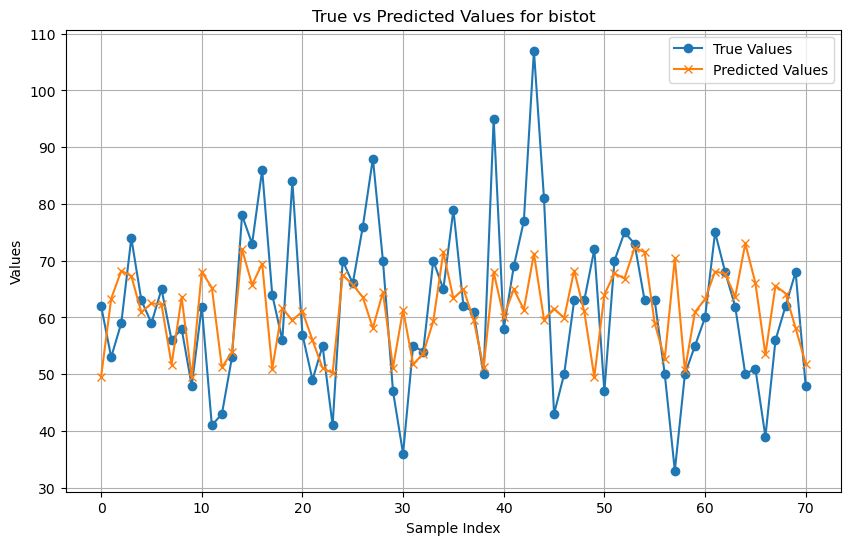

Column: bistot, Mean Squared Error: 161.96573487715574, Mean Absolute Error: 9.280930445923405, R²: 0.14687691310686324


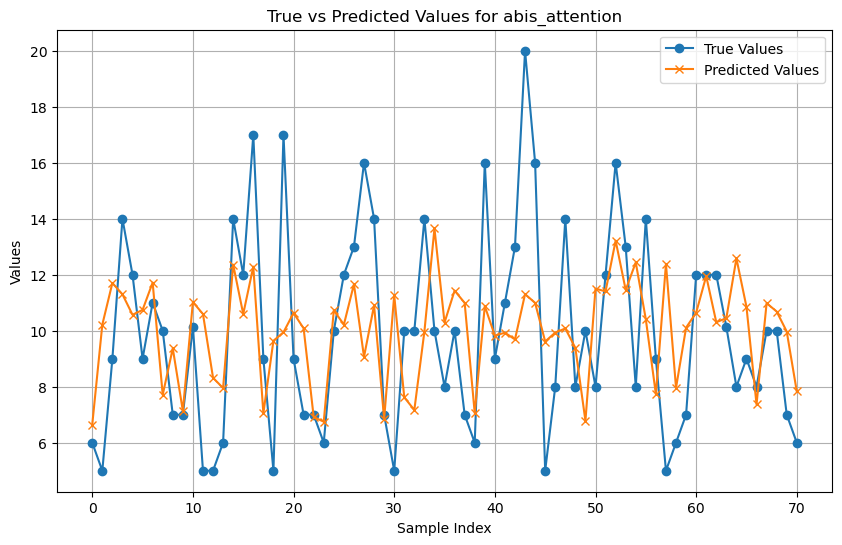

Column: abis_attention, Mean Squared Error: 10.577733476674139, Mean Absolute Error: 2.631819412199694, R²: 0.13913461966906726


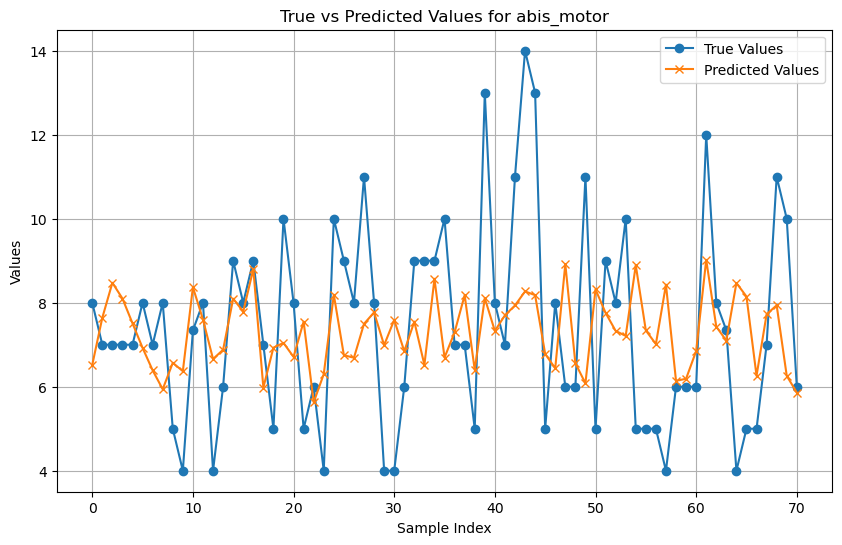

Column: abis_motor, Mean Squared Error: 5.4141301272850875, Mean Absolute Error: 1.8661307847082498, R²: 0.036157105364695186


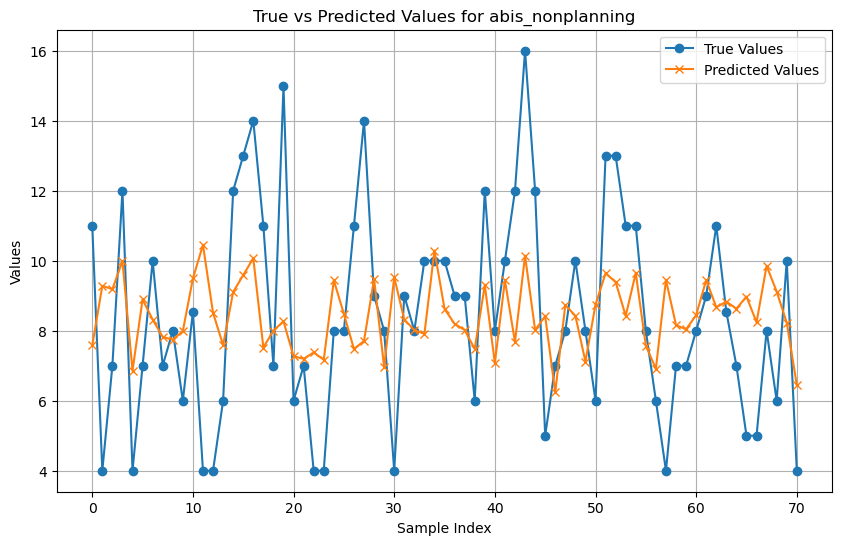

Column: abis_nonplanning, Mean Squared Error: 8.039669208370242, Mean Absolute Error: 2.278484819171438, R²: 0.0809408913896249


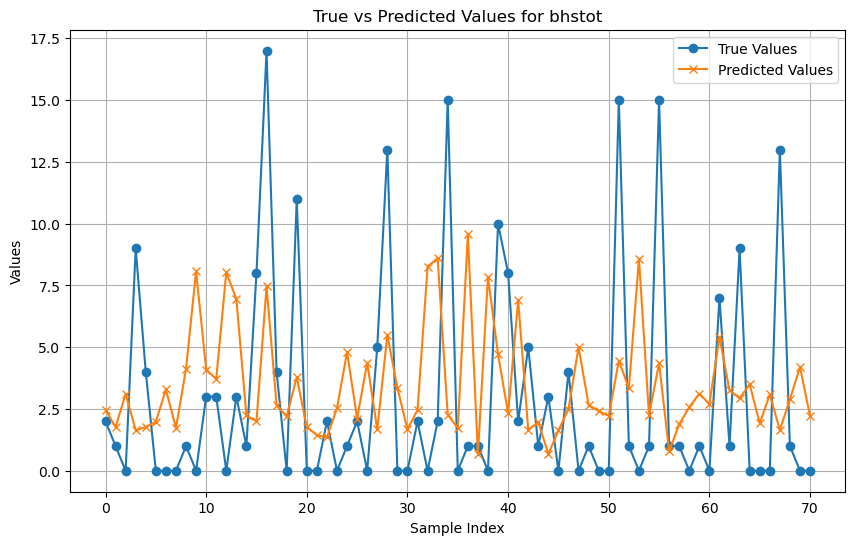

Column: bhstot, Mean Squared Error: 23.45378339593824, Mean Absolute Error: 3.7658815112899613, R²: -0.1827310041507404


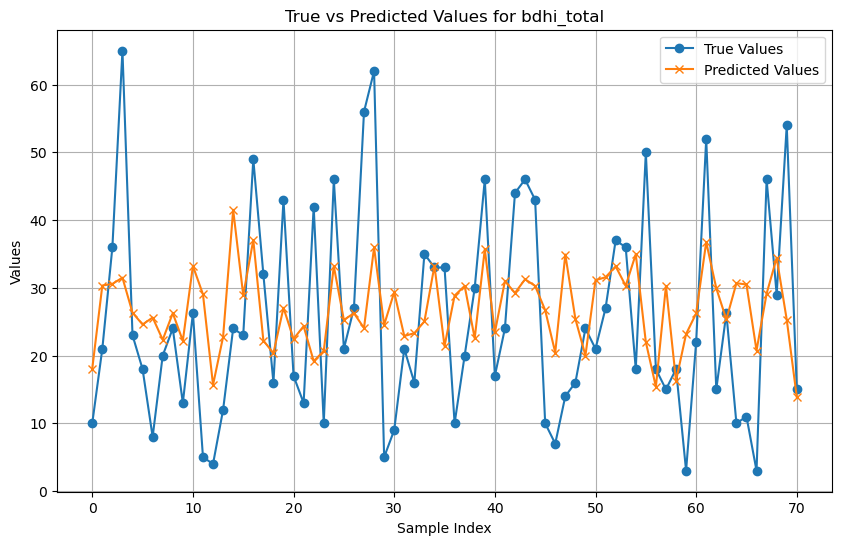

Column: bdhi_total, Mean Squared Error: 199.93472148186424, Mean Absolute Error: 11.758139203910332, R²: 0.13712509819198038


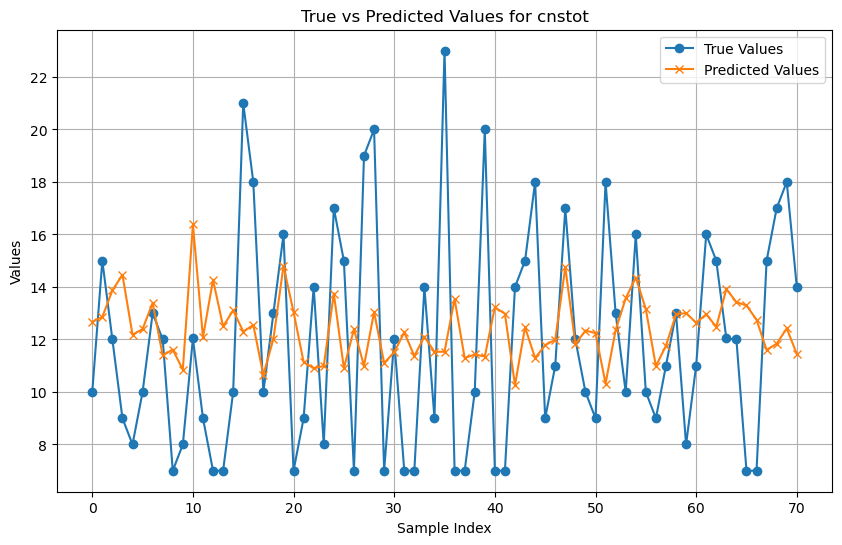

Column: cnstot, Mean Squared Error: 19.096362354022478, Mean Absolute Error: 3.6779088735990144, R²: -0.10892640341731186


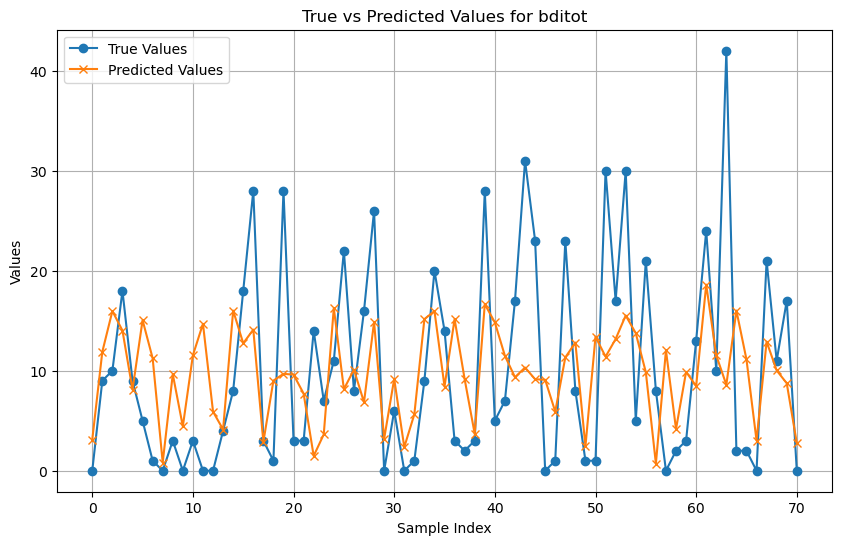

Column: bditot, Mean Squared Error: 88.90925611970343, Mean Absolute Error: 7.580787335121842, R²: 0.1309637136597065


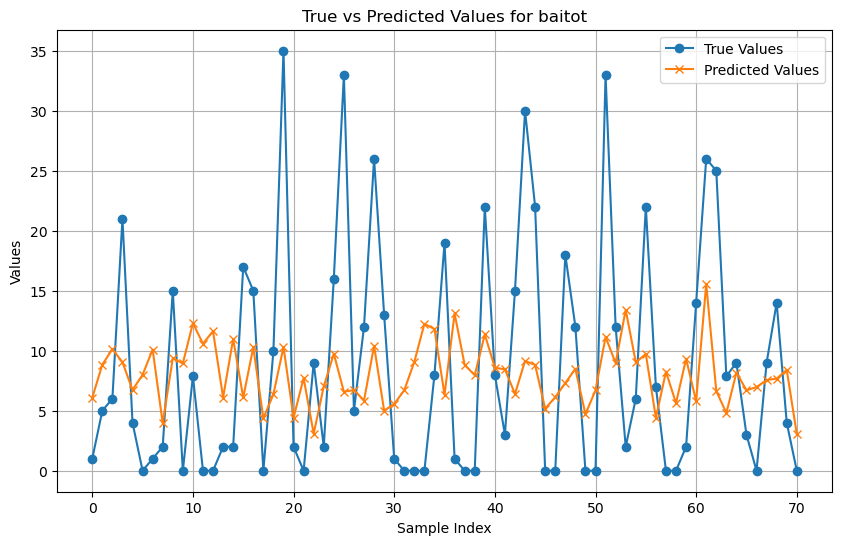

Column: baitot, Mean Squared Error: 88.2463549780612, Mean Absolute Error: 7.759454560697518, R²: 0.045116979048873684


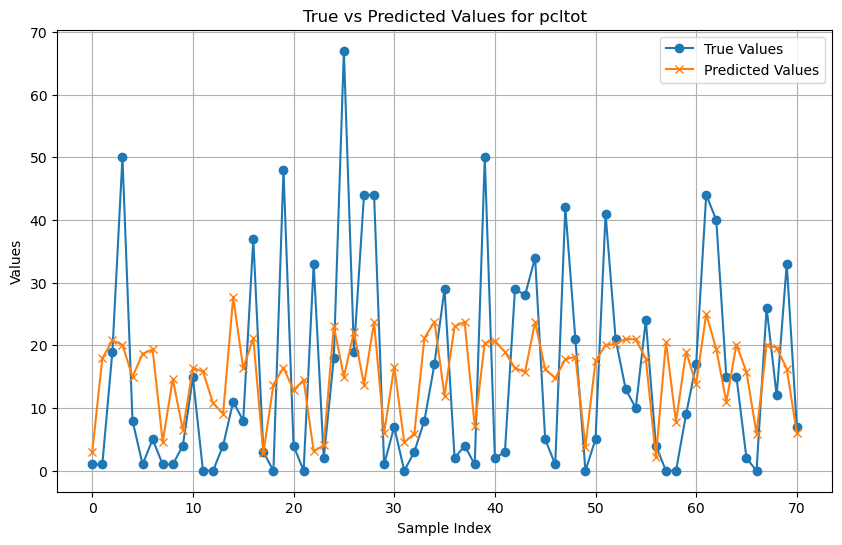

Column: pcltot, Mean Squared Error: 233.35090686653285, Mean Absolute Error: 12.08560306969052, R²: 0.13452621922933916


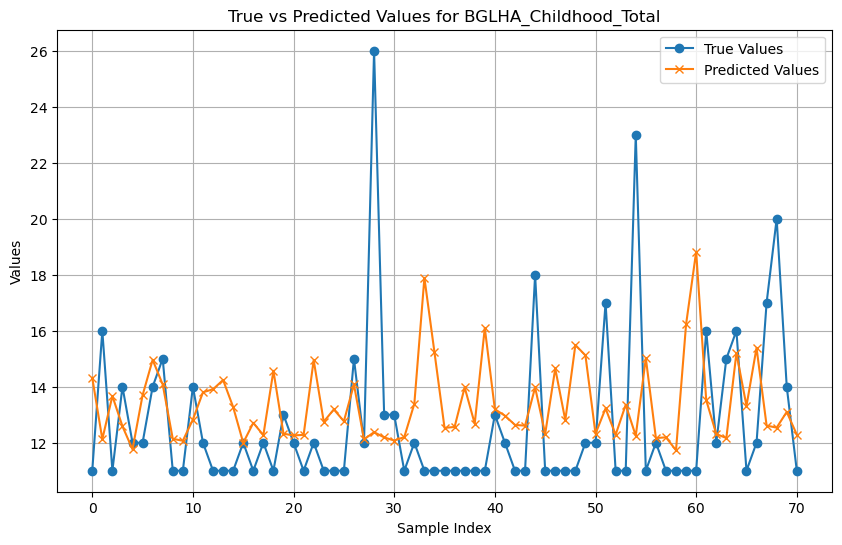

Column: BGLHA_Childhood_Total, Mean Squared Error: 11.710190023894247, Mean Absolute Error: 2.4606249720545494, R²: -0.4632657753817584


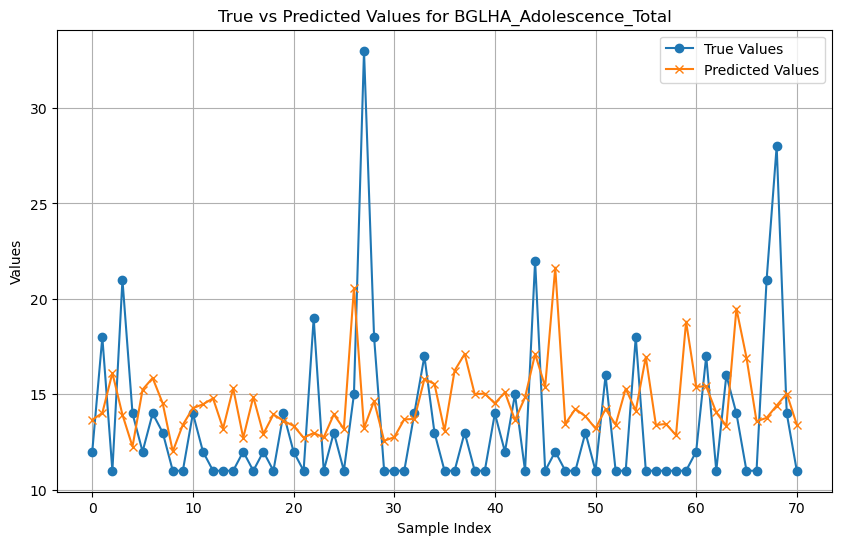

Column: BGLHA_Adolescence_Total, Mean Squared Error: 20.56503028813667, Mean Absolute Error: 3.409589984350547, R²: -0.2770808820648585


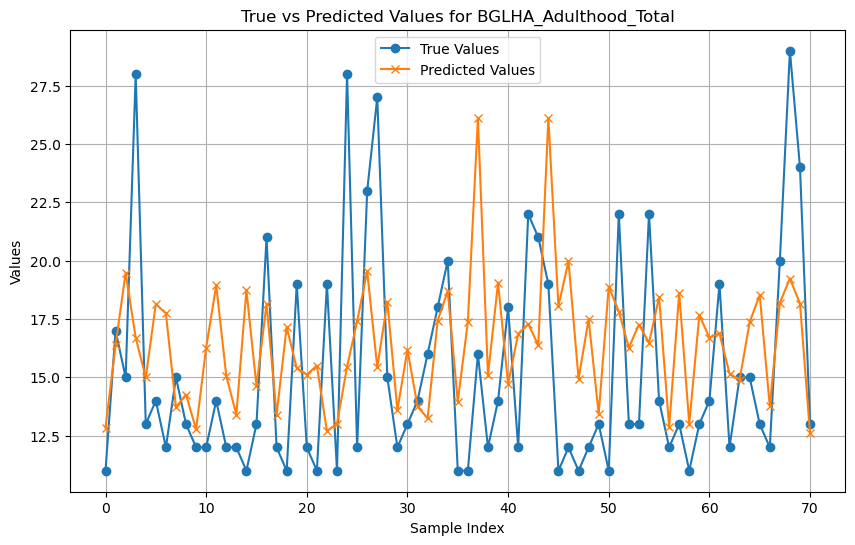

Column: BGLHA_Adulthood_Total, Mean Squared Error: 24.1166063502307, Mean Absolute Error: 4.052781131231835, R²: -0.1079581194203103


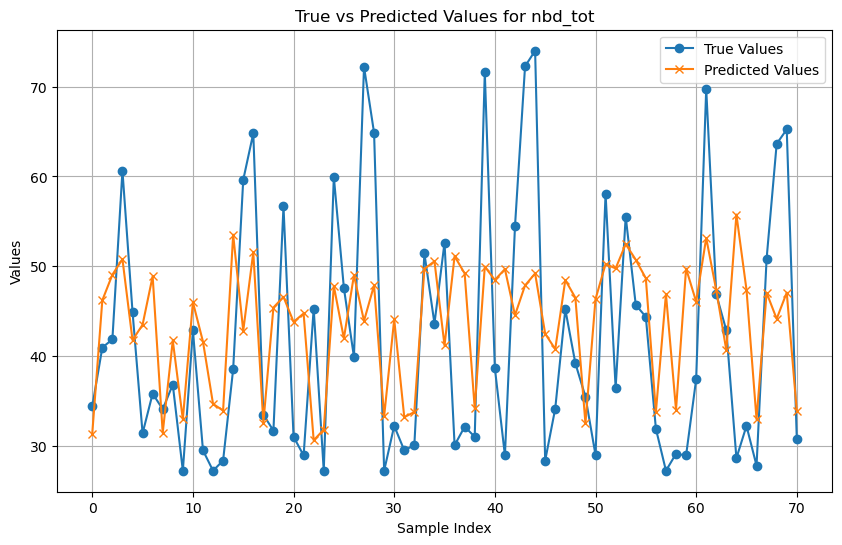

Column: nbd_tot, Mean Squared Error: 156.20388756321498, Mean Absolute Error: 10.367210707908564, R²: 0.17695744333223562


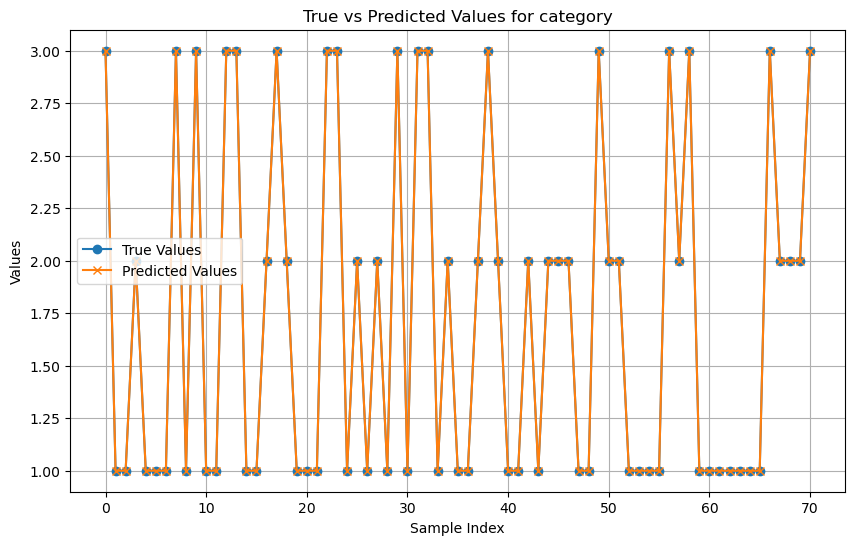

Column: category, Mean Squared Error: 0.0, Mean Absolute Error: 0.0, R²: 1.0


In [35]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

models = {}
predictions = {}

for column in neuropsych.columns:
    y = neuropsych[column]  
    X = rh_aparc_thickness
    X = X.select_dtypes(include=[np.number])

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)  
    X_test_scaled = scaler.transform(X_test) 
    
    
    model = RandomForestRegressor(random_state=42)
    model.fit(X_train_scaled, y_train)

    models[column] = model

    y_pred = model.predict(X_test_scaled)
    predictions[column] = y_pred

    plt.figure(figsize=(10, 6))
    plt.plot(y_test.reset_index(drop=True), label='True Values', marker='o')
    plt.plot(y_pred, label='Predicted Values', marker='x')
    plt.title(f'True vs Predicted Values for {column}')
    plt.xlabel('Sample Index')
    plt.ylabel('Values')
    plt.legend()
    plt.grid()
    
    file_name = f"{column}_true_vs_predicted.png"  
#     plt.savefig(os.path.join(save_path, file_name), bbox_inches='tight')  
    plt.show()

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Column: {column}, Mean Squared Error: {mse}, Mean Absolute Error: {mae}, R²: {r2}")

# Initial Step for Trainings

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# got error due to non numeric values, so removing them:

# Assume rh_aparc_thickness is your DataFrame loaded with various types of data
X = rh_aparc_thickness.copy()
# X = rh_aparc_thickness.copy().drop(columns=['category'])

# Select only numeric columns from the DataFrame
X_numeric = X.select_dtypes(include=[np.number])
X = X_numeric

# Now X_numeric contains only the numeric columns of the original DataFrame
# Proceed with scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test = train_test_split(X_scaled, test_size=0.3, random_state=42)


models = {}
predictions = {}


X_train, X_test = train_test_split(X_scaled, test_size=0.3, random_state=42)

In [37]:
X

,rh_bankssts_thickness,rh_caudalanteriorcingulate_thick,rh_caudalmiddlefrontal_thickness,rh_cuneus_thickness,rh_entorhinal_thickness,rh_fusiform_thickness,rh_inferiorparietal_thickness,rh_inferiortemporal_thickness,rh_isthmuscingulate_thickness,rh_lateraloccipital_thickness,...,rh_superiorfrontal_thickness,rh_superiorparietal_thickness,rh_superiortemporal_thickness,rh_supramarginal_thickness,rh_frontalpole_thickness,rh_temporalpole_thickness,rh_transversetemporal_thickness,rh_insula_thickness,rh_MeanThickness_thickness,category
0,2.61300,2.358,2.591,2.04000,2.768,2.73825,2.437,2.559,2.156,2.1640,...,2.604,2.373,2.7890,2.5780,2.64700,2.856,2.65275,3.012,2.48321,2
1,2.75925,2.243,2.610,1.73800,2.905,2.73100,2.549,2.677,2.315,2.2630,...,2.695,2.334,2.9415,2.6585,2.61400,2.810,2.28500,2.800,2.51874,2
2,2.60100,2.098,2.600,2.12800,3.153,2.63400,2.402,2.607,2.150,2.1990,...,2.694,2.330,2.9415,2.5460,2.62600,3.579,2.25700,3.031,2.48204,2
3,2.48100,2.015,2.348,1.89400,2.716,2.38650,2.361,2.437,2.002,2.1380,...,2.465,2.128,2.5270,2.4740,2.31100,2.946,2.30200,2.808,2.34217,1
4,2.48300,2.336,2.462,2.06100,2.624,2.73825,2.431,2.745,2.177,2.3225,...,2.639,2.351,2.8750,2.3780,2.65600,2.985,2.65275,2.928,2.49441,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,2.36700,2.313,2.553,1.77200,2.965,2.60400,2.337,2.603,2.060,2.0470,...,2.558,2.186,2.6850,2.4190,2.40300,3.293,2.28500,2.945,2.37538,2
232,2.71700,2.457,2.573,2.13325,2.864,2.62300,2.449,2.705,2.255,2.2390,...,2.613,2.204,2.9050,2.5500,2.20775,3.381,2.54100,2.865,2.45664,3
233,2.55700,2.386,2.582,1.78700,2.795,2.64400,2.575,2.696,2.015,2.2050,...,2.608,2.344,2.8600,2.5120,2.69300,3.180,2.65275,3.059,2.49968,2
234,2.45500,1.982,2.510,2.10000,2.992,2.45800,2.374,2.570,2.131,2.2100,...,2.631,2.267,2.5930,2.4620,2.56900,3.096,2.35600,2.759,2.43501,1


In [38]:
# Define the columns you want to select for modeling
## columns = ['bistot','abis_attention','abis_motor','abis_nonplanning','bhstot','bdhi_total', 'cnstot', 'bditot', 'baitot', 'pcltot', 'BGLHA_Childhood_Total', 'BGLHA_Adolescence_Total', 'BGLHA_Adulthood_Total', 'nbd_tot' ]
# selected_columns = ['bistot']  # Replace 'column1' and 'column2' with the actual column names

selected_columns = ['bistot','abis_attention','abis_motor','abis_nonplanning','bhstot','bdhi_total', 'cnstot', 'bditot', 'baitot', 'pcltot', 
'BGLHA_Childhood_Total', 'BGLHA_Adolescence_Total', 'BGLHA_Adulthood_Total', 'nbd_tot' ]


In [39]:

# selected_columns = ['nbd_tot']

In [40]:
selected_columns

['bistot',
 'abis_attention',
 'abis_motor',
 'abis_nonplanning',
 'bhstot',
 'bdhi_total',
 'cnstot',
 'bditot',
 'baitot',
 'pcltot',
 'BGLHA_Childhood_Total',
 'BGLHA_Adolescence_Total',
 'BGLHA_Adulthood_Total',
 'nbd_tot']

# Bringing Categories and setting color

In [41]:
custom_palette = {1: '#007BA7', 2: '#DC143C', 3: '#7FFF00'}
hue_order = ['1-NFL', '2-CP', '3-HC']

In [42]:
categories_file_path = r"Z:\Active-Diagnose_CTE\Fargol_Analysis\Neuropsychiatric_from_Biomarkers\categories.csv"
categories_df = pd.read_csv(categories_file_path)
new_column = categories_df['checkin_bin']
neuropsych['category'] = new_column
print(neuropsych.head())

   bistot  abis_attention  abis_motor  abis_nonplanning  bhstot  bdhi_total  \
0    72.0            12.0         6.0              12.0     0.0        23.0   
1    89.0            16.0        11.0              11.0    19.0        35.0   
2    82.0            16.0         8.0               9.0     8.0        35.0   
3    48.0             6.0         6.0               5.0     6.0        23.0   
4    43.0             5.0         4.0               4.0     1.0        23.0   

   cnstot  bditot  baitot  pcltot  BGLHA_Childhood_Total  \
0     7.0      14     9.0    19.0                     13   
1    17.0      30    41.0    31.0                     20   
2    11.0      33    14.0    18.0                     11   
3     7.0       4     9.0    17.0                     12   
4     7.0       5     1.0     3.0                     11   

   BGLHA_Adolescence_Total  BGLHA_Adulthood_Total  nbd_tot  category  
0                       18                     15  31.3636         2  
1                     

# Bar plots based on category

In [43]:
# ## For this, you need to pick each column one by one
# category_col = 'category'
# column = selected_columns

# # Define the full path for saving the figure
# filename = f"{column}_distribution.png"
# full_path = f"{save_path}/{filename}"
        

# for column in selected_columns:
#     if column != category_col:
#         plt.figure(figsize=(10, 6))
#         sns.histplot(data=neuropsych, x=column, hue=category_col, palette='Set1', multiple='stack', bins=30)
#         plt.legend(title=category_col, labels=['1-NFL', '2-CP', '3-HC'])
#         plt.title(f'Distribution of {column} by {category_col}')
#         plt.xlabel(column)
#         plt.ylabel('Frequency')
#         plt.savefig(full_path)  
#         plt.savefig(os.path.join(save_path, filename), bbox_inches='tight')  
#         plt.show() 

    

# Trying Multiple Models

In [44]:
from sklearn.ensemble import RandomForestRegressor, StackingRegressor, BaggingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from lightgbm import LGBMRegressor
import xgboost as xgb
from sklearn.svm import SVR
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import BayesianRidge
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
# from sklearn.model_selection import RandomizedSearchCV


results = []


model_name = "Random Forest Regression"

# Loop through each column in neuropsych and train a model
for column in selected_columns:
    y = neuropsych[column]  # Get the label column
    y_train, y_test = train_test_split(y, test_size=0.3, random_state=42)
    
    model = RandomForestRegressor(random_state=42)
    model.fit(X_train, y_train)

    models[column] = model

    y_pred = model.predict(X_test)
    predictions[column] = y_pred

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Append results to the list
    results.append({
        "Model": model_name,
        "Column": column,
        "Mean Squared Error": mse,
        "Mean Absolute Error": mae,
        "R^2 Score": r2
    })
    
    
    
model_name = "Multiple Linear Regression"
for column in selected_columns:
    y = neuropsych[column]  # Define the target variable for the current column
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
          
    # Append results to the list
    results.append({
        "Model": model_name,
        "Column": column,
        "Mean Squared Error": mse,
        "Mean Absolute Error": mae,
        "R^2 Score": r2
    })

    
    
model_name = "Gradient Boosting Machines"

for column in selected_columns:
    y = neuropsych[column]  # Get the label column
    y_train, y_test = train_test_split(y, test_size=0.3, random_state=42)
    
    model = LGBMRegressor(random_state=42)  # Using LightGBM for regression
    model.fit(X_train, y_train)

    models[column] = model

    y_pred = model.predict(X_test)
    predictions[column] = y_pred

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
          
    # Append results to the list
    results.append({
        "Model": model_name,
        "Column": column,
        "Mean Squared Error": mse,
        "Mean Absolute Error": mae,
        "R^2 Score": r2
    })
    
    
    

model_name = "XGBoost"

# Loop through each column in neuropsych and train a model
for column in selected_columns:
    y = neuropsych[column]  # Get the label column
    y_train, y_test = train_test_split(y, test_size=0.3, random_state=42)
    
    model = xgb.XGBRegressor(random_state=42)  
    model.fit(X_train, y_train)

    models[column] = model

    y_pred = model.predict(X_test)
    predictions[column] = y_pred

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Append results to the list
    results.append({
        "Model": model_name,
        "Column": column,
        "Mean Squared Error": mse,
        "Mean Absolute Error": mae,
        "R^2 Score": r2
    })
    
    
    
model_name = "SVR"
    
for column in selected_columns:
    y = neuropsych[column]  # Get the label column
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    model = SVR(kernel='rbf', C=0.2, epsilon=0.01)  # Default settings with RBF kernel

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Append results to the list
    results.append({
        "Model": model_name,
        "Column": column,
        "Mean Squared Error": mse,
        "Mean Absolute Error": mae,
        "R^2 Score": r2
    })
    
    

model_name = "ANN"

scaler = StandardScaler()

for column in selected_columns:
    y = neuropsych[column]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Scale the features
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # ANN model
    model = Sequential([
        Dense(128, activation='relu', input_dim=X_train_scaled.shape[1]),
        Dense(64, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    
    model.fit(X_train_scaled, y_train, epochs=100, batch_size=10, verbose=0)
    
    y_pred = model.predict(X_test_scaled).flatten()
    
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Append results to the list
    results.append({
        "Model": model_name,
        "Column": column,
        "Mean Squared Error": mse,
        "Mean Absolute Error": mae,
        "R^2 Score": r2
    })
    
    
model_name = "KNN"

for column in selected_columns:
    y = neuropsych[column]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    model = KNeighborsRegressor(n_neighbors=5)
    
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Append results to the list
    results.append({
        "Model": model_name,
        "Column": column,
        "Mean Squared Error": mse,
        "Mean Absolute Error": mae,
        "R^2 Score": r2
    })
    


model_name = "Ensemble-Stacking"

# Define the base models
base_models = [
    ('knn', KNeighborsRegressor(n_neighbors=13, leaf_size=23, p=1, weights='uniform')),
    ('svr', SVR(kernel='rbf', C=0.2, epsilon=0.01))
]

# Define the final estimator
final_estimator = Ridge()

# Create the stacking model
stack_model = StackingRegressor(estimators=base_models, final_estimator=final_estimator, cv=5)

models = {}
predictions = {}

# Loop through each column in neuropsych and train a model
for column in selected_columns:
    y = neuropsych[column]  # Get the label column
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Fit the stacking model
    stack_model.fit(X_train, y_train)
    
    models[column] = stack_model

    # Predict using the stacking model
    y_pred = stack_model.predict(X_test)
    predictions[column] = y_pred
    
    # Calculate performance metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    
    # Append results to the list
    results.append({
        "Model": model_name,
        "Column": column,
        "Mean Squared Error": mse,
        "Mean Absolute Error": mae,
        "R^2 Score": r2
    })
    

model_name = "Ensemble-Bagging"

# Define the base model
base_model = SVR(kernel='rbf', C=0.2, epsilon=0.01)

# Initialize storage for models and predictions
models = {}
predictions = {}

# Loop through each column in neuropsych and train a model
for column in selected_columns:
    y = neuropsych[column]  # Get the label column
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Create the Bagging Regressor with SVR as the base model
    bagging_model = BaggingRegressor(base_estimator=base_model, n_estimators=10, random_state=42, n_jobs=-1)
    
    # Fit the Bagging model
    bagging_model.fit(X_train, y_train)
    
    models[column] = bagging_model

    # Predict using the Bagging model
    y_pred = bagging_model.predict(X_test)
    predictions[column] = y_pred
    
    # Calculate performance metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    
    # Append results to the list
    results.append({
        "Model": model_name,
        "Column": column,
        "Mean Squared Error": mse,
        "Mean Absolute Error": mae,
        "R^2 Score": r2
    })
    

model_name = "Lasso Regression"

# Loop through each column in neuropsych and train a Lasso model
for column in selected_columns:
    y = neuropsych[column]  # Get the label column
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Lasso Regression Model with L1 regularization
    model = Lasso(alpha=0.1)  # alpha is the regularization strength; smaller values mean less regularization
    
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Append results to the list
    results.append({
        "Model": model_name,
        "Column": column,
        "Mean Squared Error": mse,
        "Mean Absolute Error": mae,
        "R^2 Score": r2
    })
    
    
model_name = "Ridge Regression"

for column in selected_columns:
    y = neuropsych[column]  # Get the label column
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Ridge Regression Model
    model = Ridge(alpha=1.0)  # alpha is the regularization strength; typical values might be 0.01, 0.1, 1, 10, etc.
    
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    
    # Append results to the list
    results.append({
        "Model": model_name,
        "Column": column,
        "Mean Squared Error": mse,
        "Mean Absolute Error": mae,
        "R^2 Score": r2
    })
    
    
model_name = "Baesian Linear Regression"

for column in selected_columns:
    y = neuropsych[column]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    model = BayesianRidge()
    
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    
    # Append results to the list
    results.append({
        "Model": model_name,
        "Column": column,
        "Mean Squared Error": mse,
        "Mean Absolute Error": mae,
        "R^2 Score": r2
    })
    
    
    
model_name = "Gaussian Processes"

kernel = RBF(1.0)

for column in selected_columns:
    y = neuropsych[column]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    model = GaussianProcessRegressor(kernel=kernel, random_state=42)
    
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Append results to the list
    results.append({
        "Model": model_name,
        "Column": column,
        "Mean Squared Error": mse,
        "Mean Absolute Error": mae,
        "R^2 Score": r2
    })
    
    
    
# Convert results to DataFrame and save to Excel
results_df = pd.DataFrame(results)
results_df.to_excel("neuropsych_from_rh_aparc_thickness.xlsx", index=False)
print("Results saved to neuropsych_from_rh_aparc_thickness.xlsx")   
    

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000197 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1659
[LightGBM] [Info] Number of data points in the train set: 165, number of used features: 36
[LightGBM] [Info] Start training from score 62.012121
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

3/3 [==============================] - 0s 1ms/step


C:\Users\fargor\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\fargor\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\fargor\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\fargor\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\fargor\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and w

Results saved to neuropsych_from_rh_aparc_thickness.xlsx


# XGBoost-Hyperparameter Optimization

In [45]:
# ## RandomizedSearchCV

# from sklearn.model_selection import RandomizedSearchCV
# import xgboost as xgb

# # Define the model
# model = xgb.XGBRegressor()

# # Define the parameter distribution
# param_dist = {
#     'max_depth': [3, 4, 5, 6, 7],
#     'n_estimators': [100, 200, 300, 400, 500],
#     'learning_rate': [0.01, 0.05, 0.1],
#     'subsample': [0.6, 0.7, 0.8, 0.9],
#     'colsample_bytree': [0.6, 0.7, 0.8, 0.9],
# }

# # Setup the random search with cross-validation
# random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=25, scoring='neg_mean_squared_error', cv=3, verbose=1, random_state=42)

# # Fit random search
# best_model = random_search.fit(X_train, y_train)

# # Best parameters and best score
# print("Best parameters:", random_search.best_params_)
# print("Best score:", random_search.best_score_)


In [46]:
# # rerun the model based on values I got from RandomizedSearchCV

# model_name = "XGBoost-Randomized"

# results = []

# for column in selected_columns:
#     y = neuropsych[column]  # Get the label column
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#     model = xgb.XGBRegressor(
#         colsample_bytree=0.7, 
#         learning_rate=0.01, 
#         max_depth=7, 
#         n_estimators=100, 
#         subsample=0.6,
#         random_state=42
#     )

#     model.fit(X_train, y_train)

#     y_pred = model.predict(X_test)

#     mse = mean_squared_error(y_test, y_pred)
#     mae = mean_absolute_error(y_test, y_pred)
#     r2 = r2_score(y_test, y_pred)
    
#     # Append results to the list
#     results.append({
#         "Model": model_name,
#         "Column": column,
#         "Mean Squared Error": mse,
#         "Mean Absolute Error": mae,
#         "R^2 Score": r2
#     })
    

# results_df = pd.DataFrame(results)
# results_df.to_excel("neuropsych_from_rh_aparc_thickness.xlsx", index=False)
# print("Results saved to neuropsych_from_rh_aparc_thickness.xlsx")


In [47]:
# ## GridSearchCV

# from sklearn.model_selection import GridSearchCV
# import xgboost as xgb

# # Define the model
# model = xgb.XGBRegressor()

# # Define the parameter grid
# param_grid = {
#     'max_depth': [3, 4, 5],
#     'n_estimators': [50, 100, 200],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'subsample': [0.7, 0.8, 0.9],
#     'colsample_bytree': [0.7, 0.8, 0.9],
# }

# # Setup the grid search
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3, verbose=1)

# # Fit grid search
# best_model = grid_search.fit(X_train, y_train)

# # Best parameters and best score
# print("Best parameters:", grid_search.best_params_)
# print("Best score:", grid_search.best_score_)

In [48]:
# # rerun the model based on values I got from GridSearchCV

# model_name = "XGBoost-GridSearch"

# results = []


# for column in selected_columns:
#     y = neuropsych[column]  # Get the label column
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#     # Initialize XGBoost with the best parameters from Grid Search
#     model = xgb.XGBRegressor(
#         colsample_bytree=0.8, 
#         learning_rate=0.01, 
#         max_depth=3, 
#         n_estimators=50, 
#         subsample=0.7,
#         random_state=42
#     )

#     # Fit the model
#     model.fit(X_train, y_train)

#     # Predict on the test set
#     y_pred = model.predict(X_test)

#     # Calculate metrics
#     mse = mean_squared_error(y_test, y_pred)
#     mae = mean_absolute_error(y_test, y_pred)
#     r2 = r2_score(y_test, y_pred)

#     # Append results to the list
#     results.append({
#         "Model": model_name,
#         "Column": column,
#         "Mean Squared Error": mse,
#         "Mean Absolute Error": mae,
#         "R^2 Score": r2
#     })

# results_df = pd.DataFrame(results)
# results_df.to_excel("neuropsych_from_rh_aparc_thickness.xlsx", index=False)
# print("Results saved to neuropsych_from_rh_aparc_thickness.xlsx")

